In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

2024-07-24 15:49:10.487113: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import data

In [2]:
data = pd.read_csv('Pediatrac INS SPSS July2024.csv')

In [3]:
# Isolate participants with EEG data
data = data.dropna(subset=['theta_1L']) # 45 x 718
data = data.reset_index(drop=True)

data

,part_id,site,risk,infant_sex,risk_num,term,ADI_NATRANK,ADI_STATERNK,cg_age_enroll,dem_11,...,beta_4Z,beta_5Z,beta_6Z,beta_7Z,beta_1LA,beta_2LA,beta_3LA,beta_1RA,beta_2RA,beta_3RA
0,1017,EMU,low,female,0,Full-Term,56,4,33.829579,7,...,17.9366,2.8390,1.6313,2.7444,7.6048,1.1492,0.5495,17.5082,1.7390,1.2840
1,1022,EMU,low,male,0,Full-Term,61,5,33.364021,7,...,43.9943,0.9319,1.1284,2.7151,20.6170,5.9387,4.5441,15.8698,2.2798,4.8221
2,1024,EMU,low,female,0,Full-Term,84,7,29.539165,6,...,0.6150,0.7490,1.3686,1.3681,1.1419,0.7736,0.6574,3.1939,4.0956,0.7880
3,1051,EMU,low,male,0,Full-Term,40,2,23.461239,5,...,26.4816,7.0253,29.8763,123.0496,4.2275,14.7017,5.8257,1615.0269,15.3432,16.5328
4,2010,UM,low,female,0,Full-Term,19,1,33.865172,7,...,2.1553,1.3879,4.0939,6.6537,2.6261,40.4650,16.0300,3.0206,3.6735,47.0423
5,2020,UM,low,female,0,Full-Term,40,2,40.348421,5,...,1.2521,1.2354,1.0623,2.3119,3.7351,1.3982,0.7971,4.3478,1.2470,1.5817
6,2021,UM,low,male,0,Full-Term,100,10,30.494808,5,...,1.9464,2.2726,2.1870,7.4386,6.0879,0.6361,1.2220,8.3357,3.3343,6.1580
7,2027,UM,low,male,0,Full-Term,19,1,36.969958,7,...,4.1359,7.6566,1.1231,0.6773,12.4592,1.4893,2.2619,13.2960,1.2879,1.0775
8,2036,UM,low,female,0,Full-Term,13,1,30.869902,5,...,1.9184,6.7375,1.3898,1.7070,2.9841,4.0070,5.5248,4.8248,2.5733,4.7913
9,2042,UM,low,female,0,Full-Term,9,1,27.406335,3,...,1.9406,1.8285,2.9255,2.6064,2.1768,3.1625,2.9196,2.6451,5.7177,2.0979


In [4]:
# Define the function to calculate power for each frequency band
def calculate_power(data):
    data['theta_power'] = data.loc[:, 'theta_1L':'theta_3RA'].mean(axis=1)
    data['alpha_power'] = data.loc[:, 'alpha_1L':'alpha_3RA'].mean(axis=1)
    data['beta_power'] = data.loc[:, 'beta_1L':'beta_3RA'].mean(axis=1)
    return data

data = calculate_power(data)
display(data)

,part_id,site,risk,infant_sex,risk_num,term,ADI_NATRANK,ADI_STATERNK,cg_age_enroll,dem_11,...,beta_7Z,beta_1LA,beta_2LA,beta_3LA,beta_1RA,beta_2RA,beta_3RA,theta_power,alpha_power,beta_power
0,1017,EMU,low,female,0,Full-Term,56,4,33.829579,7,...,2.7444,7.6048,1.1492,0.5495,17.5082,1.7390,1.2840,9.300432,5.401639,6.755218
1,1022,EMU,low,male,0,Full-Term,61,5,33.364021,7,...,2.7151,20.6170,5.9387,4.5441,15.8698,2.2798,4.8221,14.095182,8.391339,10.001475
2,1024,EMU,low,female,0,Full-Term,84,7,29.539165,6,...,1.3681,1.1419,0.7736,0.6574,3.1939,4.0956,0.7880,11.589136,4.794029,1.166879
3,1051,EMU,low,male,0,Full-Term,40,2,23.461239,5,...,123.0496,4.2275,14.7017,5.8257,1615.0269,15.3432,16.5328,427.575846,190.279264,79.484971
4,2010,UM,low,female,0,Full-Term,19,1,33.865172,7,...,6.6537,2.6261,40.4650,16.0300,3.0206,3.6735,47.0423,21.671614,10.672346,8.566082
5,2020,UM,low,female,0,Full-Term,40,2,40.348421,5,...,2.3119,3.7351,1.3982,0.7971,4.3478,1.2470,1.5817,12.271593,8.002904,1.940914
6,2021,UM,low,male,0,Full-Term,100,10,30.494808,5,...,7.4386,6.0879,0.6361,1.2220,8.3357,3.3343,6.1580,23.435146,7.834996,5.376789
7,2027,UM,low,male,0,Full-Term,19,1,36.969958,7,...,0.6773,12.4592,1.4893,2.2619,13.2960,1.2879,1.0775,33.683225,15.816532,6.802968
8,2036,UM,low,female,0,Full-Term,13,1,30.869902,5,...,1.7070,2.9841,4.0070,5.5248,4.8248,2.5733,4.7913,29.372604,12.822450,2.940661
9,2042,UM,low,female,0,Full-Term,9,1,27.406335,3,...,2.6064,2.1768,3.1625,2.9196,2.6451,5.7177,2.0979,18.023354,11.797446,3.456064


# Predicting theta, alpha, beta power values with wppsi

In [11]:
# List of potential target variables
target_vars = [
    'wppsi_bd_ss',
    'wppsi_bd_descriptor',
    'wppsi_in_raw',
    'wppsi_in_ss',
    'wppsi_in_descriptor',
    'wppsi_pm_raw',
    'wppsi_pm_ss',
    'wppsi_pm_descriptor',
    'wppsi_fsiq_sumss',
    'wppsi_fsiq_scaled',
    'wppsi_fsiq_ss'
]

# Initialize variables to store the best results
best_mse = float('inf')
best_r2 = float('-inf')
best_target = None

# Iterate through each target variable
for target in target_vars:
    X = data[['theta_power', 'alpha_power', 'beta_power']]
    y = data[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Check if the current model is the best
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_target = target
    
    # Print evaluation metrics for current target variable
    print(f"Target variable: {target}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

# Print the best result
print("Best target variable based on Mean Squared Error and R-squared:")
print(f"Target variable: {best_target}")
print("Best Mean Squared Error:", best_mse)
print("Best R-squared:", best_r2)

Target variable: wppsi_bd_ss
Mean Squared Error: 152.2144156276377
R-squared: -170.2412175810924

Target variable: wppsi_bd_descriptor
Mean Squared Error: 4.615127787731412
R-squared: -25.701810771874598

Target variable: wppsi_in_raw
Mean Squared Error: 8.151996943965845
R-squared: -0.8548082934304309

Target variable: wppsi_in_ss
Mean Squared Error: 25.624535035566826
R-squared: -6.630835801032768

Target variable: wppsi_in_descriptor
Mean Squared Error: 1.5840898358400166
R-squared: 0.2079550820799917

Target variable: wppsi_pm_raw
Mean Squared Error: 195.00944544480666
R-squared: -7.974866523312125

Target variable: wppsi_pm_ss
Mean Squared Error: 31.388879500824007
R-squared: -2.49244401039388

Target variable: wppsi_pm_descriptor
Mean Squared Error: 126.33307708077135
R-squared: -80.21412098049588

Target variable: wppsi_fsiq_sumss
Mean Squared Error: 2356.589650591898
R-squared: -509.3843895666945

Target variable: wppsi_fsiq_scaled
Mean Squared Error: 589.1474126479745
R-square

# Predicting theta, alpha, beta power values with k-cpt

In [12]:
# List of potential target (X) variables
target_vars = [
    'kcpt_detectability_t',
    'kcpt_detectability_descr',
    'kcpt_omissions_t',
    'kcpt_omissions_descr',
    'kcpt_commissions_t',
    'kcpt_commissions_descr',
    'kcpt_perseverations_descr',
    'kcpt_hrt_score', 
    'kcpt_hrt_descr',
    'kcpt_variability_t',
    'kcpt_variability_descr',
    'kcpt_hrt_block_tscore',
    'kcpt_hrt_block_descr',
    'kcpt_hrt_isi_tscore',
    'kcpt_hrt_isi_descr',
    'kcpt_complete',
]

# Initialize variables to store the best results
best_mse = float('inf')
best_r2 = float('-inf')
best_target = None

# Iterate through each target variable
for target in target_vars:
    print(f"Processing target variable: {target}")

    # Extract features and target variable
    X = data[['theta_power', 'alpha_power', 'beta_power']]
    y = data[target]
    
    # Check for NaN values in target variable
    if np.any(np.isnan(y)):
        print(f"NaN values found in target variable {target}. Handling missing values.")
        
        # Option 1: Remove rows with NaN values
        mask = ~np.isnan(y)
        X_clean = X[mask]
        y_clean = y[mask]
        
        # Option 2: Impute missing values with mean (uncomment if needed)
        # imputer = SimpleImputer(strategy='mean')
        # y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()
        # X_clean = X
        # y_clean = y_imputed
    else:
        X_clean = X
        y_clean = y
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Check if the current model is the best
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_target = target
    
    # Print evaluation metrics for current target variable
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

# Print the best result
print("Best target variable based on Mean Squared Error:")
print(f"Target variable: {best_target}")
print("Best Mean Squared Error:", best_mse)
print("Best R-squared:", best_r2)

Processing target variable: kcpt_detectability_t
Mean Squared Error: 736.4952096179869
R-squared: -22.104613469812914

Processing target variable: kcpt_detectability_descr
Mean Squared Error: 40.46298355426679
R-squared: -44.52085649855014

Processing target variable: kcpt_omissions_t
Mean Squared Error: 634.1109977283654
R-squared: -11.346872792307115

Processing target variable: kcpt_omissions_descr
Mean Squared Error: 3.1825298969252094
R-squared: -1.8642769072326884

Processing target variable: kcpt_commissions_t
Mean Squared Error: 764.2751809291495
R-squared: -10.464127713937243

Processing target variable: kcpt_commissions_descr
Mean Squared Error: 18.432486632899884
R-squared: -23.081151891369203

Processing target variable: kcpt_perseverations_descr
Mean Squared Error: 23.0749206934456
R-squared: -6.723423868467328

Processing target variable: kcpt_hrt_score
Mean Squared Error: 41.05532457048733
R-squared: 0.10364385708639501

Processing target variable: kcpt_hrt_descr
Mean Sq

# Predicting dominant frequency using wppsi 

In [5]:
# Extract features and power columns
features = ['wppsi_bd_ss', 'wppsi_bd_descriptor', 'wppsi_in_raw', 'wppsi_in_ss', 
            'wppsi_in_descriptor', 'wppsi_pm_raw', 'wppsi_pm_ss', 'wppsi_pm_descriptor', 
            'wppsi_fsiq_sumss', 'wppsi_fsiq_scaled', 'wppsi_fsiq_ss']
power_columns = ['theta_power', 'alpha_power', 'beta_power']

# Determine the dominant power
data['dominate_power'] = data[power_columns].idxmax(axis=1)

# Encode the target variable
encoder = LabelEncoder()
data['dominate_power_encoded'] = encoder.fit_transform(data['dominate_power'])

# Split the data into features and target
X = data[features]
y = data['dominate_power_encoded']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=8, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict dominant power for the entire dataset
y_pred_full = model.predict(X_scaled)
y_pred_full_labels = np.argmax(y_pred_full, axis=1)
predicted_power_full = encoder.inverse_transform(y_pred_full_labels)

# Add predictions to the full dataset 
data['predicted_power'] = predicted_power_full

display(data)


Epoch 1/15


/Users/erinconeill/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.1917 - loss: 0.7978 - val_accuracy: 0.7500 - val_loss: 0.7380
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5250 - loss: 0.6848 - val_accuracy: 0.7500 - val_loss: 0.6590
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9333 - loss: 0.6059 - val_accuracy: 1.0000 - val_loss: 0.5941
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9417 - loss: 0.5346 - val_accuracy: 1.0000 - val_loss: 0.5364
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9667 - loss: 0.4786 - val_accuracy: 1.0000 - val_loss: 0.4824
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9792 - loss: 0.4316 - val_accuracy: 1.0000 - val_loss: 0.4310
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9667 - loss: 0.3895 - val_accuracy: 1.0000 - val_loss: 0.3757
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9875 - loss: 0.3145 - val_accuracy: 1.0000 - val_loss: 0.3216
Epoch 9/15

,part_id,site,risk,infant_sex,risk_num,term,ADI_NATRANK,ADI_STATERNK,cg_age_enroll,dem_11,...,beta_3LA,beta_1RA,beta_2RA,beta_3RA,theta_power,alpha_power,beta_power,dominate_power,dominate_power_encoded,predicted_power
0,1017,EMU,low,female,0,Full-Term,56,4,33.829579,7,...,0.5495,17.5082,1.7390,1.2840,9.300432,5.401639,6.755218,theta_power,1,theta_power
1,1022,EMU,low,male,0,Full-Term,61,5,33.364021,7,...,4.5441,15.8698,2.2798,4.8221,14.095182,8.391339,10.001475,theta_power,1,theta_power
2,1024,EMU,low,female,0,Full-Term,84,7,29.539165,6,...,0.6574,3.1939,4.0956,0.7880,11.589136,4.794029,1.166879,theta_power,1,theta_power
3,1051,EMU,low,male,0,Full-Term,40,2,23.461239,5,...,5.8257,1615.0269,15.3432,16.5328,427.575846,190.279264,79.484971,theta_power,1,theta_power
4,2010,UM,low,female,0,Full-Term,19,1,33.865172,7,...,16.0300,3.0206,3.6735,47.0423,21.671614,10.672346,8.566082,theta_power,1,theta_power
5,2020,UM,low,female,0,Full-Term,40,2,40.348421,5,...,0.7971,4.3478,1.2470,1.5817,12.271593,8.002904,1.940914,theta_power,1,theta_power
6,2021,UM,low,male,0,Full-Term,100,10,30.494808,5,...,1.2220,8.3357,3.3343,6.1580,23.435146,7.834996,5.376789,theta_power,1,theta_power
7,2027,UM,low,male,0,Full-Term,19,1,36.969958,7,...,2.2619,13.2960,1.2879,1.0775,33.683225,15.816532,6.802968,theta_power,1,theta_power
8,2036,UM,low,female,0,Full-Term,13,1,30.869902,5,...,5.5248,4.8248,2.5733,4.7913,29.372604,12.822450,2.940661,theta_power,1,theta_power
9,2042,UM,low,female,0,Full-Term,9,1,27.406335,3,...,2.9196,2.6451,5.7177,2.0979,18.023354,11.797446,3.456064,theta_power,1,theta_power


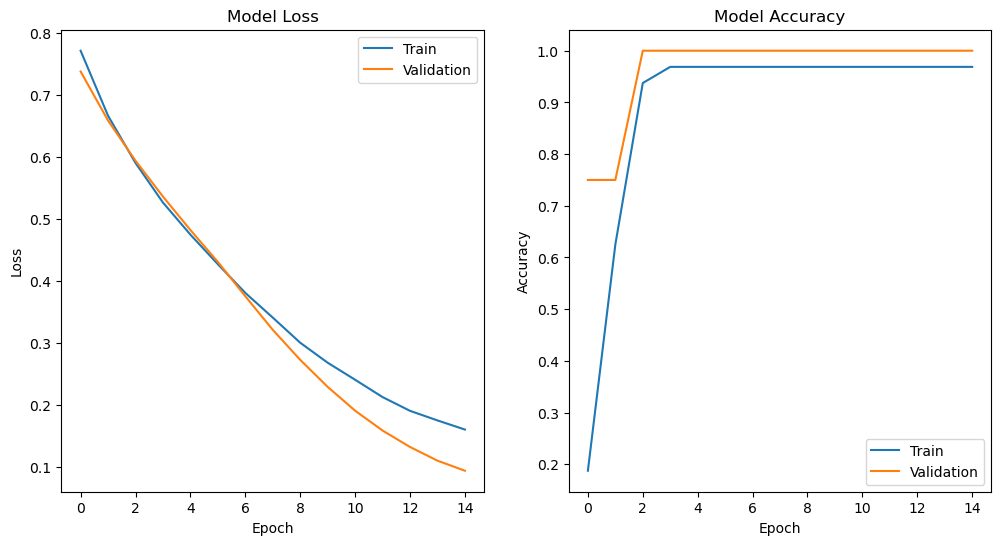

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


# Predicting dominant frequency using k-cpt

In [10]:
# Extract features and power columns
features = ['kcpt_detectability_t', 'kcpt_detectability_descr', 'kcpt_omissions_t', 'kcpt_omissions_descr', 
            'kcpt_commissions_t', 'kcpt_commissions_descr', 'kcpt_perseverations_t', 'kcpt_perseverations_descr', 
            'kcpt_hrt_score', 'kcpt_hrt_descr', 'kcpt_variability_t', 'kcpt_variability_descr', 'kcpt_hrt_block_tscore',
            'kcpt_hrt_block_descr', 'kcpt_hrt_isi_tscore', 'kcpt_hrt_isi_descr']
power_columns = ['theta_power', 'alpha_power', 'beta_power']

# Determine the dominant power
data['dominate_power'] = data[power_columns].idxmax(axis=1)

# Encode the target variable
encoder = LabelEncoder()
data['dominate_power_encoded'] = encoder.fit_transform(data['dominate_power'])

# Split the data into features and target
X = data[features]
y = data['dominate_power_encoded']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=8, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict dominant power for the entire dataset
y_pred_full = model.predict(X_scaled)
y_pred_full_labels = np.argmax(y_pred_full, axis=1)
predicted_power_full = encoder.inverse_transform(y_pred_full_labels)

# Add predictions to the full dataset
data['predicted_power'] = predicted_power_full

display(data)

Epoch 1/15


/Users/erinconeill/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.3625 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0583 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0333 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0333 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0125 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0583 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0583 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0583 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/15
4/4 ━━━━━━━━━━━━

,part_id,site,risk,infant_sex,risk_num,term,ADI_NATRANK,ADI_STATERNK,cg_age_enroll,dem_11,...,beta_3LA,beta_1RA,beta_2RA,beta_3RA,theta_power,alpha_power,beta_power,dominate_power,dominate_power_encoded,predicted_power
0,1017,EMU,low,female,0,Full-Term,56,4,33.829579,7,...,0.5495,17.5082,1.7390,1.2840,9.300432,5.401639,6.755218,theta_power,1,alpha_power
1,1022,EMU,low,male,0,Full-Term,61,5,33.364021,7,...,4.5441,15.8698,2.2798,4.8221,14.095182,8.391339,10.001475,theta_power,1,alpha_power
2,1024,EMU,low,female,0,Full-Term,84,7,29.539165,6,...,0.6574,3.1939,4.0956,0.7880,11.589136,4.794029,1.166879,theta_power,1,alpha_power
3,1051,EMU,low,male,0,Full-Term,40,2,23.461239,5,...,5.8257,1615.0269,15.3432,16.5328,427.575846,190.279264,79.484971,theta_power,1,alpha_power
4,2010,UM,low,female,0,Full-Term,19,1,33.865172,7,...,16.0300,3.0206,3.6735,47.0423,21.671614,10.672346,8.566082,theta_power,1,alpha_power
5,2020,UM,low,female,0,Full-Term,40,2,40.348421,5,...,0.7971,4.3478,1.2470,1.5817,12.271593,8.002904,1.940914,theta_power,1,alpha_power
6,2021,UM,low,male,0,Full-Term,100,10,30.494808,5,...,1.2220,8.3357,3.3343,6.1580,23.435146,7.834996,5.376789,theta_power,1,alpha_power
7,2027,UM,low,male,0,Full-Term,19,1,36.969958,7,...,2.2619,13.2960,1.2879,1.0775,33.683225,15.816532,6.802968,theta_power,1,alpha_power
8,2036,UM,low,female,0,Full-Term,13,1,30.869902,5,...,5.5248,4.8248,2.5733,4.7913,29.372604,12.822450,2.940661,theta_power,1,alpha_power
9,2042,UM,low,female,0,Full-Term,9,1,27.406335,3,...,2.9196,2.6451,5.7177,2.0979,18.023354,11.797446,3.456064,theta_power,1,alpha_power


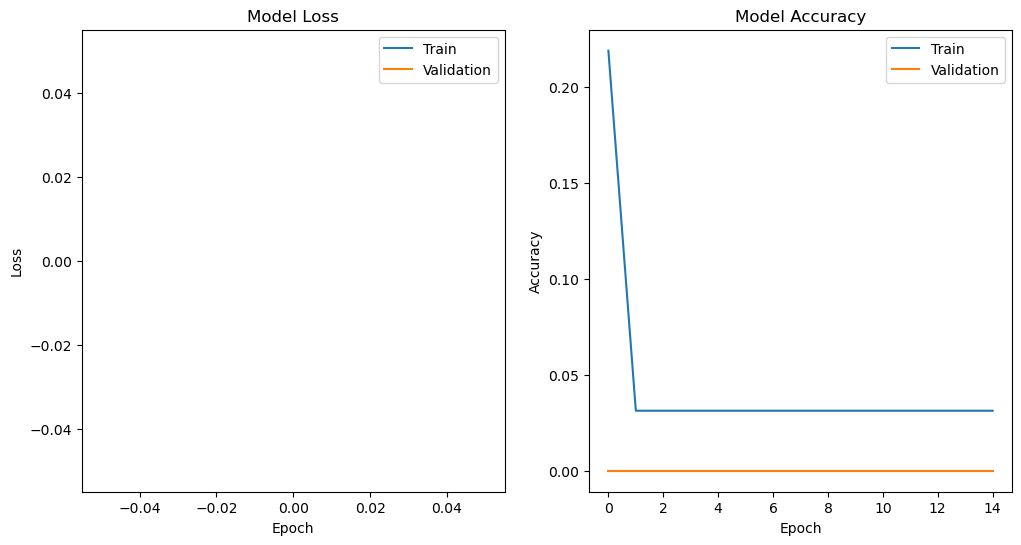

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [ ]:
# 27 features to predict target